# <a href="https://thetahat.ru/courses/bm-2024-aut">Статистика ФБМФ</a>

## Домашнее задание 13

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 20 баллов

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 3 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash;  30 баллов

-----

In [41]:
# Bot check

# HW_ID: st_hw13
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [42]:
import numpy as np
import pandas as pd
import scipy.stats as sps

from statsmodels.stats.proportion import proportion_confint

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import statsmodels.formula.api as smf

sns.set(font_scale=1.2, palette='Set2')

## Теоретическая часть
### <b><font color="blue">Легкая часть</font></b>

## Задача 1

Рассмотрим модель линейной регрессии

$$Y = X \theta + ɛ,$$

где $Y \in \mathbb{R}^n$ - отклик, $X \in \mathbb{R}^{n \times d}$, $\theta \in \mathbb{R}^d$, $ɛ \in \mathbb{R}^n$ - шум, $n > d$, $rk X = d$.

Будем рассматривать нормальный и гомоскедастичный шум, т.е. $ɛ \sim \mathcal{N}(0, \sigma^2 I_n)$

1. Получите выражение для функции правдоподобия в данной модели. Минимизации какой функции потерь эквивалента максимизация правдоподобия в данной задаче?

2. Найдите оценку максимального правдоподобия для $(\theta, \sigma^2)$.

### <b><font color="orange">Сложная часть</font></b>

## Задача 2

Существует взвешенный метод наименьших квадратов, в котором каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет вид: $$\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 \to \min\limits_\theta$$ Найдите решение задачи в матричном виде.

# Практическая часть

### <b><font color="blue">Легкая часть</font></b>

## Задача 3


Рассмотрим [данные по пациентам](https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset?select=diabetes.csv), страдающим диабетом.

Скачайте файл и оставьте колонки:
* `Age` &mdash; возраст;
* `BloodPressure` &mdash; диастолическое давление;
* `Insulin` &mdash; уровень инсулина;
* `Outcome` &mdash; флаг наличия диабета у пациента (0 &mdash; нет диабета, 1 &mdash; есть диабет );

Задача состоит в том, чтобы исследовать работоспособность различных видов AB тестирования, построенных на линейной регрессии с разными признаками, на распределении уровня инсулина (признак `Insulin`).

Для определения вероятности ошибки первого рода и мощности критерия используйте выборки размера `sample_size` (определен ниже), сэплированные из датасета.

In [43]:
data = pd.read_csv('/content/diabetes 3.csv')

In [44]:
data = data[['Age', 'BloodPressure', 'Insulin', 'Outcome']]
data

,Age,BloodPressure,Insulin,Outcome
0,50,72,0,1
1,31,66,0,0
2,32,64,0,1
3,21,66,94,0
4,33,40,168,1
...,...,...,...,...
763,63,76,180,0
764,27,70,0,0
765,30,72,112,0
766,47,60,0,1


In [45]:
alpha = 0.05
sample_size = 150
n_iter = 10000

In [46]:
x_data = data[data['Outcome'] == 1]['Insulin']
y_data = data[data['Outcome'] == 0]['Insulin']

In [47]:
def draw_interval(
    real_alpha, left_alpha, right_alpha,
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(6, 2))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_alpha, right_alpha], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_alpha)-1e-3, max(alpha, right_alpha)+1e-3))
        plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_alpha:.2f}%, {100*right_alpha:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

def calculate_real_alpha(n_rejects, n_iter):
    '''
    Оценка реального уровня значимости и его дов. интервала.

    Аргументы:
    n_rejects -- количество ошибок в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    real_alpha -- оценка реального уровня значимости
    left_alpha, right_alpha -- границы соотв. дов. интервала
    '''

    real_alpha = n_rejects / n_iter
    left_alpha, right_alpha = proportion_confint(n_rejects, n_iter, method='wilson')

    return real_alpha, left_alpha, right_alpha

In [114]:
def AB_test(
    test, x_data, y_data=None,
    lin_ttest = False, condition=None,
    n_iter=10000, sample_size=1000,  alpha=0.05
):
    '''
    Проведение серии AВ-тестов на исторических выборках.

    Аргументы:
    test -- статистический критерий
    x_data, y_data -- данные, из которых будут семплирповаться выборки
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    '''

    n_rejects = 0  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        # Генерируем выборки

        if y_data is None:
            # если y_data не задано, то семплируем y_sample из x_data
            x_sample = x_data.sample(sample_size, replace=True).reset_index(drop=True)
            y_sample = x_data.sample(sample_size, replace=True).reset_index(drop=True)
        else:
            x_sample = x_data.sample(sample_size, replace=True).reset_index(drop=True)
            y_sample = y_data.sample(sample_size, replace=True).reset_index(drop=True)

        # Применяем критерий
        if condition is None:
          if test == lin_ttest_AB:
            n_rejects += test(x_sample, y_sample, condition = condition)[1]
          else:
            n_rejects += test(x_sample, y_sample)[1]

        else:
          n_rejects += test(x_sample, y_sample, condition = condition)[1]

    # Реальный уровень значимости
    real_alpha, left_alpha, right_alpha = calculate_real_alpha(n_rejects, n_iter)
    draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

### 1. Обычный t-тест

Начнём с применения обычного t-теста. Оцените реальный уровень значимости критерия и его мощность на ваших данных

100%|██████████| 10000/10000 [00:36<00:00, 275.50it/s]


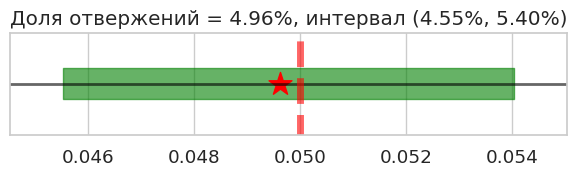

In [128]:
# Ваш код
AB_test(sps.ttest_ind, x_data, y_data, n_iter=n_iter, sample_size=sample_size, alpha=alpha)
t_stat, p_value = sps.ttest_ind(x_data, y_data)

In [129]:
p = sps.norm.sf(sps.norm.ppf(1 - alpha) - t_stat)
print(f"мощность: {p}")

мощность: 6.101945532212096e-96


### 2. Линейные модели на основе ковариат
Перейдём к использованию линейных моделей. Построим следующую модель:

$$
Y = \theta_0 + \theta_1  t + X^T\Theta
$$

где $X$ - это признаки, влияющие на целевую переменную;  $t$ - флаг наличия диабета.

Если будет иметься значимое отклонение значения параметра $\theta_1$, то можно считать, что среднее двух групп различается. Для проверки этого требуется критерий Стьюдента.

In [116]:
def lin_ttest(x_data, y_data, condition):
    '''
    Абсолютный t-test.

    :param x_data: данные тестовой группы
    :param y_data: данные контрольной группы
    :param condition: формула, описывающая модель линейной регрессии
    :return: статистика критерия, p-value
    '''

    data = pd.DataFrame({'Outcome': x_data, 'Insulin': y_data})

    if condition is not None:
        for col in condition.columns:
            data[col] = condition[col]

    data = data.reset_index(drop=True)

    if condition is not None:
        formula = 'Insulin ~ Outcome + ' + ' + '.join(condition.columns)
    else:
        formula = 'Insulin ~ Outcome'


    model = smf.ols(formula, data=data).fit()

    influence = model.get_influence()
    student_resid = influence.resid_studentized_internal

    plt.figure(figsize=(12, 6))
    plt.scatter(data['Insulin'], student_resid, alpha=0.4)
    plt.xlabel('признак')
    plt.ylabel('остатки модели')
    plt.title('График студентизированных остатков')
    plt.show()

    t_stat = model.tvalues['Outcome']
    p_value = model.pvalues['Outcome']

    return t_stat, p_value

In [102]:
def lin_ttest_AB(x_data, y_data, condition):
    '''
    Абсолютный t-test.

    :param x_data: данные тестовой группы
    :param y_data: данные контрольной группы
    :param condition: формула, описывающая модель линейной регрессии
    :return: статистика критерия, p-value
    '''

    data = pd.DataFrame({'Outcome': x_data, 'Insulin': y_data})

    if condition is not None:
        for col in condition.columns:
            data[col] = condition[col]

    data = data.reset_index(drop=True)

    if condition is not None:
        formula = 'Insulin ~ Outcome + ' + ' + '.join(condition.columns)
    else:
        formula = 'Insulin ~ Outcome'


    model = smf.ols(formula, data=data).fit()
    '''
    influence = model.get_influence()
    student_resid = influence.resid_studentized_internal

    plt.figure(figsize=(12, 6))
    plt.scatter(data['Insulin'], student_resid, alpha=0.4)
    plt.xlabel('Уровень инсулина')
    plt.ylabel('Студентизированные остатки модели')
    plt.title('График студентизированных остатков')
    plt.show()
'''
    t_stat = model.tvalues['Outcome']
    p_value = model.pvalues['Outcome']

    return t_stat, p_value

Поэкспериментируйте с выбором ковариат (дополнительных признаков). Проведите оценку реального уровня значимости и мощности критерия.

Не забудьте проверить данные на гомоскедастичность и при необходимости сделать соответствующие поправки.

In [92]:
data = data[['Age', 'BloodPressure', 'Insulin', 'Outcome']]
x_data=data['Outcome']
y_data=data['Insulin']

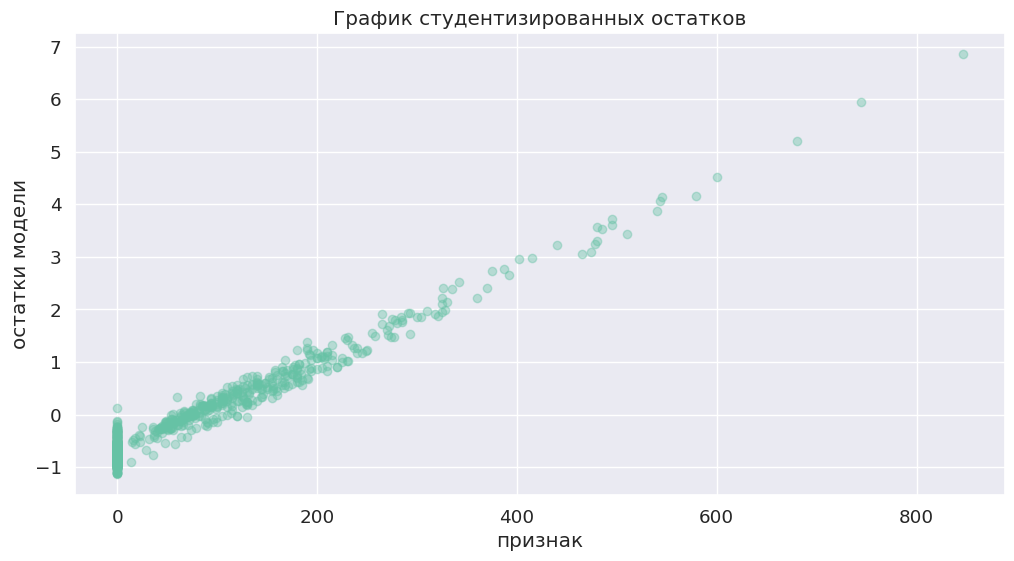

статистика:  4.04490743455721
p-value:  5.7660662107710835e-05


In [130]:
lt = lin_ttest(x_data, y_data, condition=data[['Age', 'BloodPressure']])
print("статистика: ", lt[0])
print("p-value: ", lt[1])

In [131]:
p = sps.norm.sf(sps.norm.ppf(1 - alpha) - lt[0])
print(f"мощность: {p}")

мощность: 0.9918036689936579


100%|██████████| 10000/10000 [02:21<00:00, 70.50it/s]


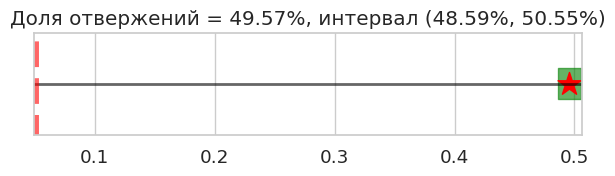

In [101]:
AB_test(lin_ttest, x_data, y_data, n_iter=n_iter, sample_size=sample_size, alpha=alpha, condition=data[['Age', 'BloodPressure']])

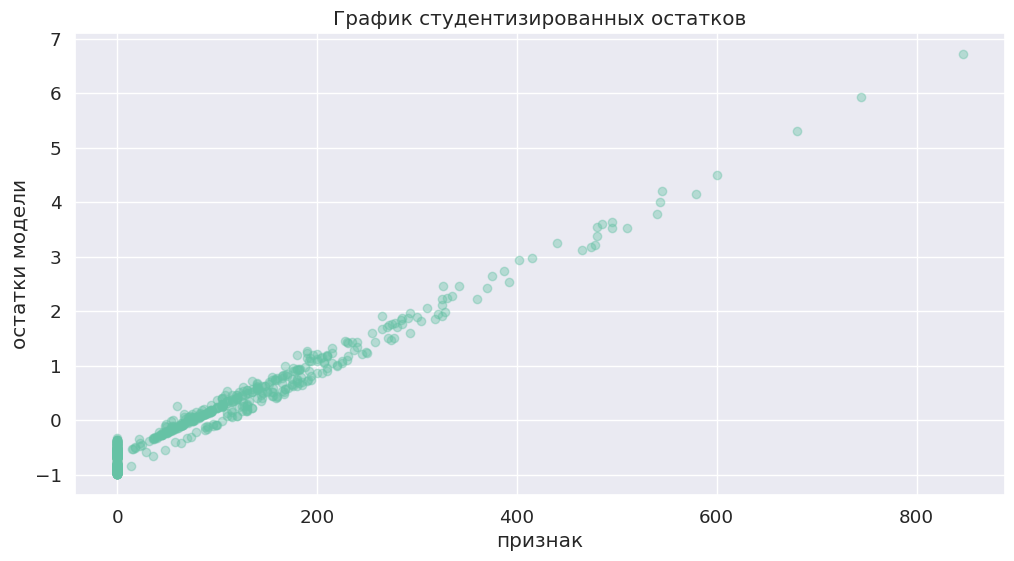

статистика:  4.0504604498988925
p-value:  5.633031689622533e-05


In [132]:
lt = lin_ttest(x_data, y_data, condition=data[['Age']])
print("статистика: ", lt[0])
print("p-value: ", lt[1])

In [133]:
p = sps.norm.sf(sps.norm.ppf(1 - alpha) - lt[0])
print(f"мощность: {p}")

мощность: 0.9919271845613179


100%|██████████| 10000/10000 [02:27<00:00, 67.68it/s]


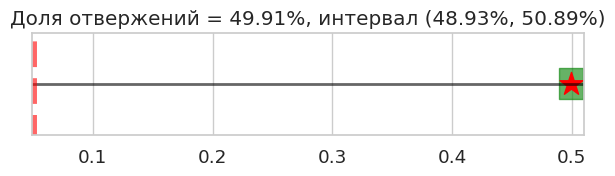

In [106]:
AB_test(lin_ttest_AB, x_data, y_data, n_iter=n_iter, sample_size=sample_size, alpha=alpha, condition=data[['Age', 'BloodPressure']])

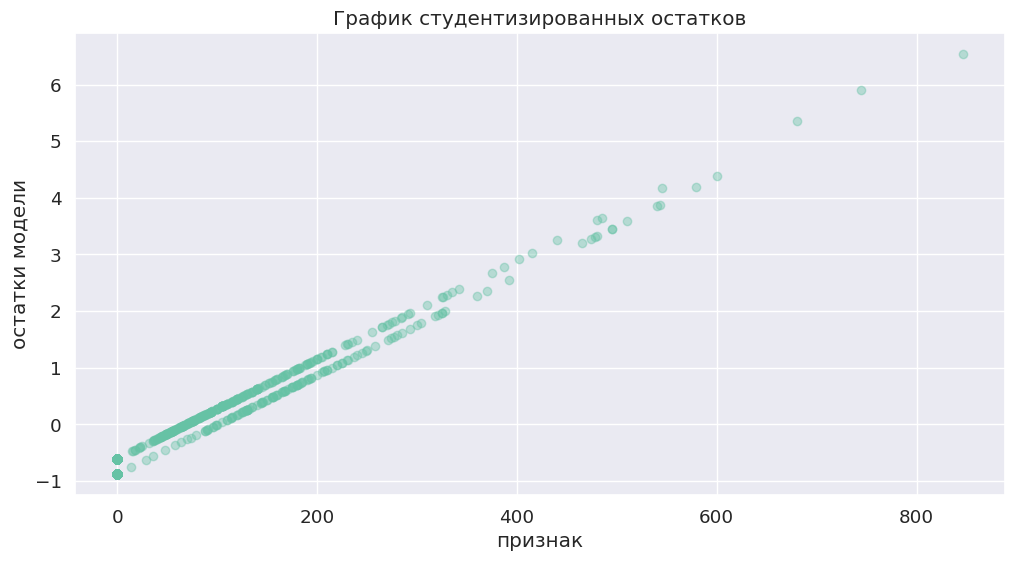

статистика:  3.644325387653559
p-value:  0.00028618646036032117


In [134]:
lt = lin_ttest(x_data, y_data, condition = None)
print("статистика: ", lt[0])
print("p-value: ", lt[1])

In [135]:
p = sps.norm.sf(sps.norm.ppf(1 - alpha) - lt[0])
print(f"мощность: {p}")

мощность: 0.9772213328321326


100%|██████████| 10000/10000 [01:28<00:00, 112.62it/s]


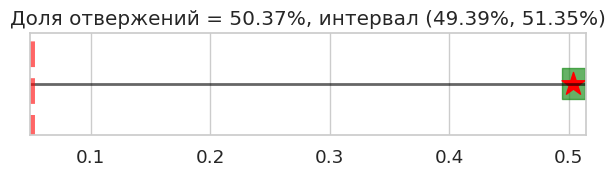

In [115]:
AB_test(lin_ttest_AB, x_data, y_data, n_iter=n_iter, sample_size=sample_size, alpha=alpha,  condition = None)

Не забудьте про выводы

на всех графиках явно видна гетероскедатичность.

во всех случаях доля отвержений намного больше, чем ожидалась (больше в 10 раз). наименьший уровень значимости вышел при использовании всех признаков, а наибольший в линейном случае.

возможно, результаты такие плохие, потому что в нашей задаче нелинейная зависимость и такой линейный тест нам не подходит.

### <b><font color="orange">Сложная часть</font></b>

## Задача 4

В данной задаче нужно проверить на несмещенность МНК-оценку в линейной регрессии.

1. Опишите, какие величины в модели, приведенной в задаче 1, являются
    - случайными
    - неизвестными

2. При заданных $X, Y$ выпишите формулу для решения задачи МНК $\widehat{\theta}_{МНК}$

3. Визуализируйте, является ли данная оценка несмещенной. Для этого нужно во многих экспериментах посчитать реализации оценки $\widehat{\theta}_{МНК}$ и нанести их на график.
    - Опишите, как должны генерироваться выборки для визуализации. Какие величины в формулах из задачи 1 должны быть зафиксированы? Какие должны меняться от эксперимента к эксперименту? Каким образом?
    - Задайте сами истинное значение $\theta$ и значения признаков $X \in \mathbb{R}^{n \times d}$. Учитывайте, что для выполнения условия теоремы с лекции $n > d$ и $rk X = d$. Сгенерируйте зашумленные значения $Y$, с помощью которых можно получить выборки для каждого вида оценки. Распределение шума $ɛ$ можно считать нормальным.
  
  **Внимание:** вы должны получить $n$ реализаций $Y$, по которым будут посчитаны $n$ реализаций оценок каждого вида.

1) ε — вектор случайных ошибок - случайная величина

Y — зависимая переменная, которая тоже является случайной, потому что зависит от ε.

θ — неизвестная величина - вектор параметров модели, его необходимо оценить.

X - тоже неизвестная величина.

2) $\hat{\theta}_{\text{МНК}} = (X^T X)^{-1} X^T Y$


3) зафиксированные величины:

- истинное значение параметра θ

- матрица признаков X

величины, меняющиеся от эксперимента к эксперименту:

- вектор ошибок ε - генерируется случайным образом в каждом эксперименте из нормального распределения

*алгоритм*
1. выбираем конкретное значение θ

2. генерируем матрицу X с рангом d и размерностью n на d
3. генерируем ошибки ε
4. вычисляем Y=Xθ+ε.
4. считаем оценку

In [138]:
def est_plot(estimation, sample_count, sample_sizes, theta):
    plt.figure(figsize=(15, 7))

    for i in range(sample_count):
        plt.plot(sample_sizes, estimation[i, :], color='blue', alpha=0.05)
    plt.hlines(theta, sample_sizes.min(), sample_sizes.max(), color='red')
    plt.title('Поведение оценки для разных реализаций')
    plt.xlabel('Размер выборки')
    plt.ylabel('Оценка параметра')
    plt.ylim((theta - 2, theta + 2))
    plt.legend([Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='red', lw=2)],
               [r'$\hat{\theta}$', r'$\theta$'])
    plt.show()

<ipython-input-139-a2b6709e19cc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimations[i, j] = estimate_theta_OLS(X[:sample_size], Y)


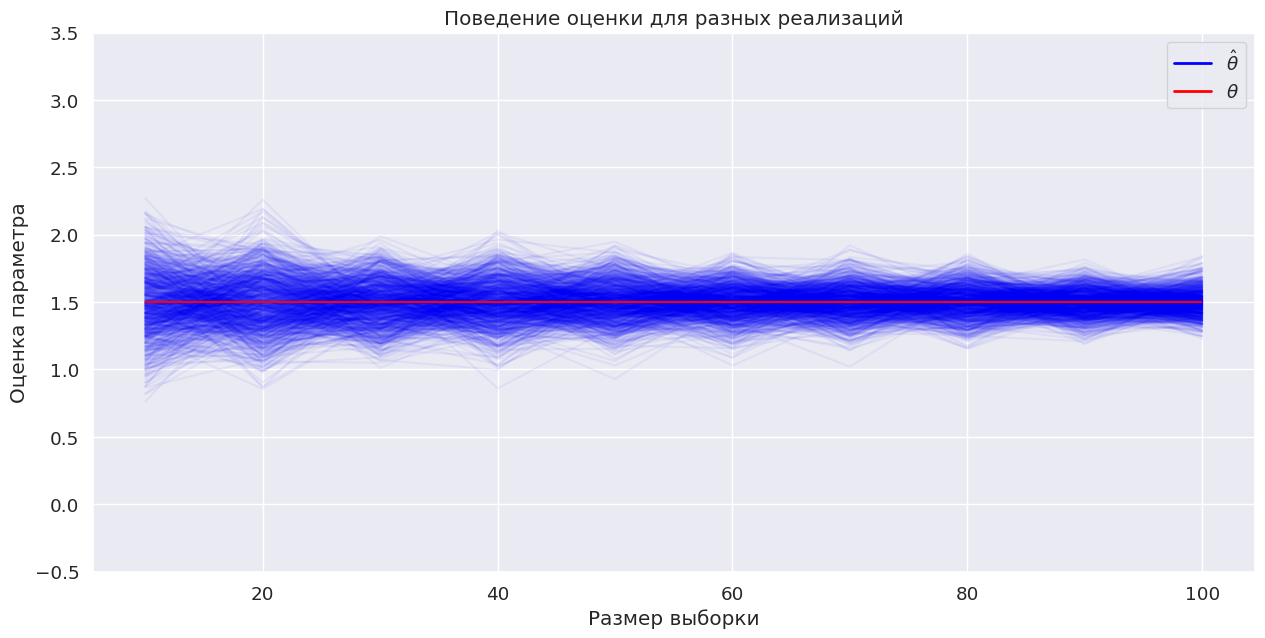

In [139]:
from matplotlib.lines import Line2D

n = 100
theta = np.array([1.5])
X = np.random.randn(n, 1)

def generate_Y(X, theta, noise_std=1.0):
    epsilon = sps.norm.rvs(loc=0, scale=noise_std, size=X.shape[0])
    Y = X @ theta + epsilon
    return Y

def estimate_theta_OLS(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

sample_count = 1000
sample_sizes = np.arange(10, n+1, 10)
estimations = np.zeros((sample_count, len(sample_sizes)))

for i in range(sample_count):
    for j, sample_size in enumerate(sample_sizes):
        Y = generate_Y(X[:sample_size], theta)
        estimations[i, j] = estimate_theta_OLS(X[:sample_size], Y)

est_plot(estimations, sample_count, sample_sizes, theta)
